# Machine Learning Modeling Using the Normal Dataset

In [1]:
%%capture
from Exploratory_Data_Analysis import *
%matplotlib inline
import pycaret
from pycaret.classification import *

### combine "X_train_res" and "y_train_res""

In [2]:
train_data = pd.concat([X, y], axis=1)
s = setup(data=train_data, target='class', session_id=123, normalize=True)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Original data shape,"(155, 20)"
4,Transformed data shape,"(155, 20)"
5,Transformed train set shape,"(108, 20)"
6,Transformed test set shape,"(47, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


## Compare Models

In [3]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8718,0.8382,0.9778,0.8778,0.9239,0.5191,0.5623,0.1500
ada,Ada Boost Classifier,0.8718,0.7972,0.9431,0.9089,0.9212,0.5631,0.6002,0.0940
et,Extra Trees Classifier,0.8627,0.8528,0.9306,0.9028,0.9146,0.5368,0.5568,0.1260
gbc,Gradient Boosting Classifier,0.8545,0.8042,0.9333,0.8931,0.9110,0.5047,0.5215,0.1110
lightgbm,Light Gradient Boosting Machine,0.8536,0.8278,0.9319,0.9002,0.9100,0.5054,0.5337,17.8950
knn,K Neighbors Classifier,0.8445,0.8354,0.9083,0.9049,0.9040,0.4535,0.4602,0.0460
ridge,Ridge Classifier,0.8355,0.7951,0.9194,0.8846,0.8988,0.4193,0.4362,0.0330
xgboost,Extreme Gradient Boosting,0.8255,0.8340,0.9319,0.8712,0.8948,0.3594,0.3870,0.0640
lda,Linear Discriminant Analysis,0.8173,0.7951,0.8972,0.8821,0.8864,0.3805,0.3932,0.0320
svm,SVM - Linear Kernel,0.8164,0.7667,0.8722,0.9063,0.8848,0.3832,0.3989,0.0320


Random Forest Classifier, Ada Boost Classifier, Extra Trees Classifier, Gradient Boosting Classifier, Light Gradient Boosting Machine, K Neighbors Classifier, Ridge Classifier, Extreme Gradient Boosting, Linear Discriminant Analysis, SVM - Linear Kernel, Logistic Regression, Decision Tree Classifier, Dummy Classifier, Quadratic Discriminant Analysis, Naive Bayes 

In [4]:
get_metrics(best)

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x76ed52682980>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, response_method=('d...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, response_method='pre...",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, response_method='...",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, response_method='predict...",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x76ed52682d40>,"make_scorer(cohen_kappa_score, response_method...",pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x76ed52682fc0>,"make_scorer(matthews_corrcoef, response_method...",pred,{},True,True,False


In [5]:
best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

## Analyzing the Model

In [6]:
#### Functional API
evaluate_model(best)


#### OOP API
# s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

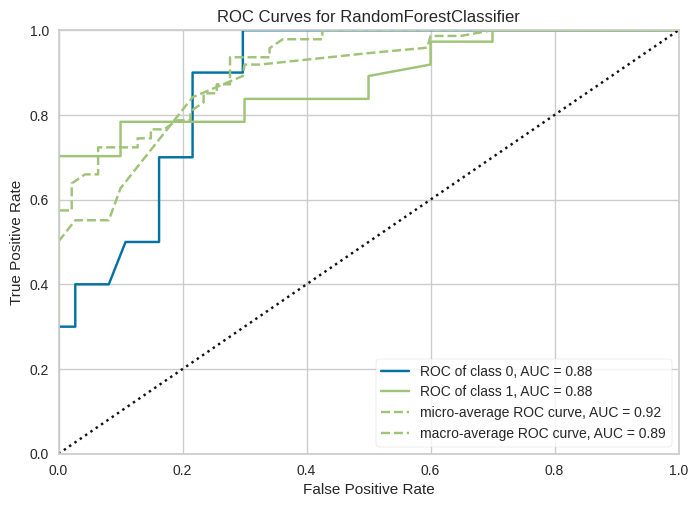

In [7]:
plot_model(best) #Functional API 

In [8]:
attr_dict = {
    'pipeline': "Schematic drawing of the preprocessing pipeline",
    'auc': "Area Under the Curve",
    'threshold': "Discrimination Threshold",
    'pr': "Precision Recall Curve",
    'confusion_matrix': "Confusion Matrix",
    'error': "Class Prediction Error",
    'class_report': "Classification Report",
    'boundary': "Decision Boundary",
    'rfe': "Recursive Feature Selection",
    'learning': "Learning Curve",
    'manifold': "Manifold Learning",
    'calibration': "Calibration Curve",
    'vc': "Validation Curve",
    'dimension': "Dimension Learning",
    'feature': "Feature Importance",
    'feature_all': "Feature Importance (All)",
    'parameter': "Model Hyperparameter",
    'lift': "Lift Curve",
    'gain': "Gain Chart",
    'tree': "Decision Tree",
    'ks': "KS Statistic Plot",
}

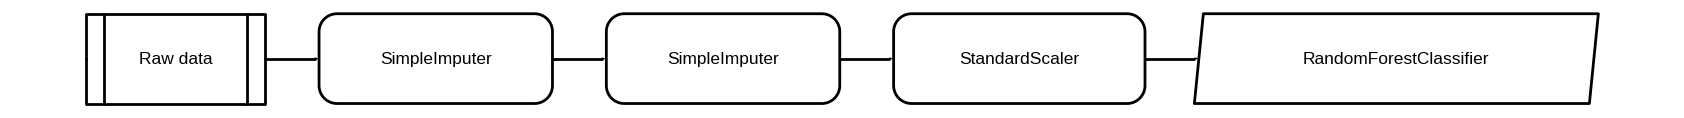


===== Area Under the Curve =====


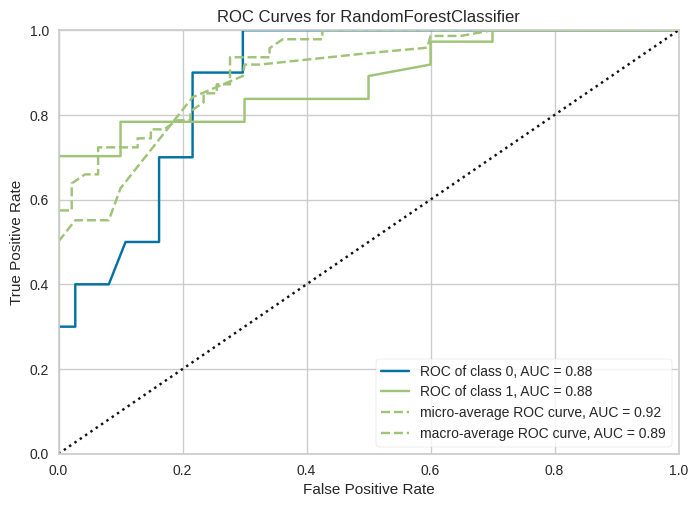


===== Discrimination Threshold =====


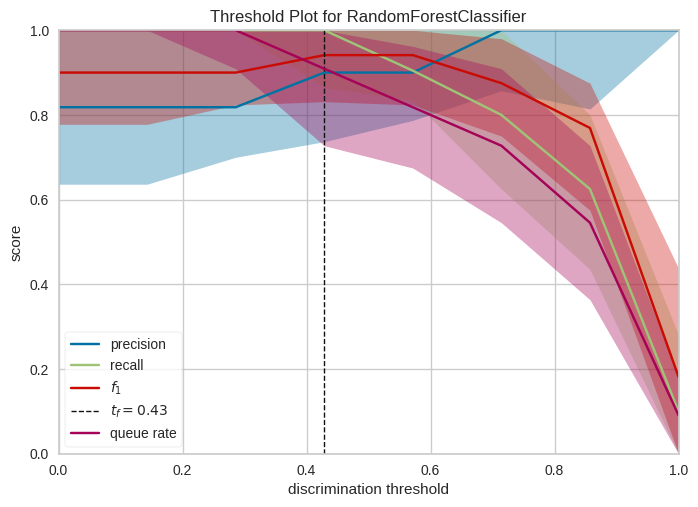


===== Precision Recall Curve =====


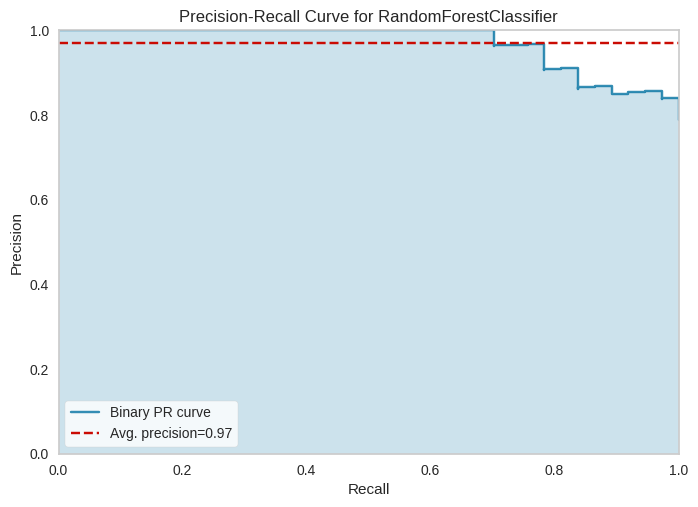


===== Confusion Matrix =====


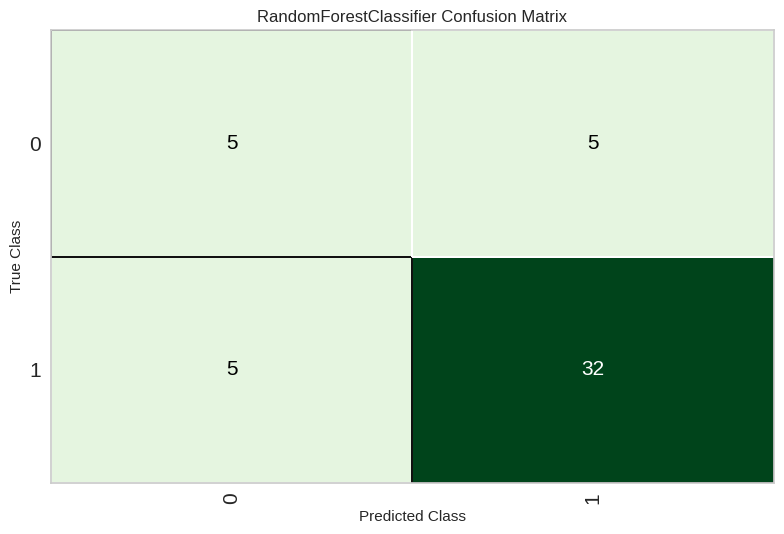


===== Class Prediction Error =====


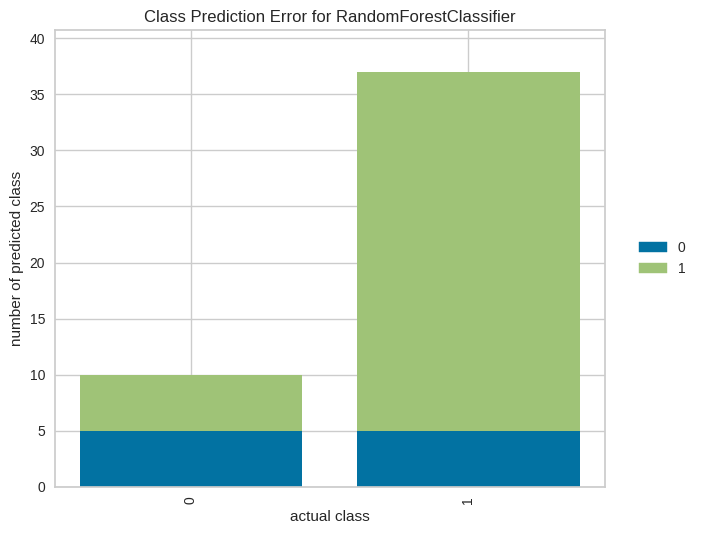


===== Classification Report =====


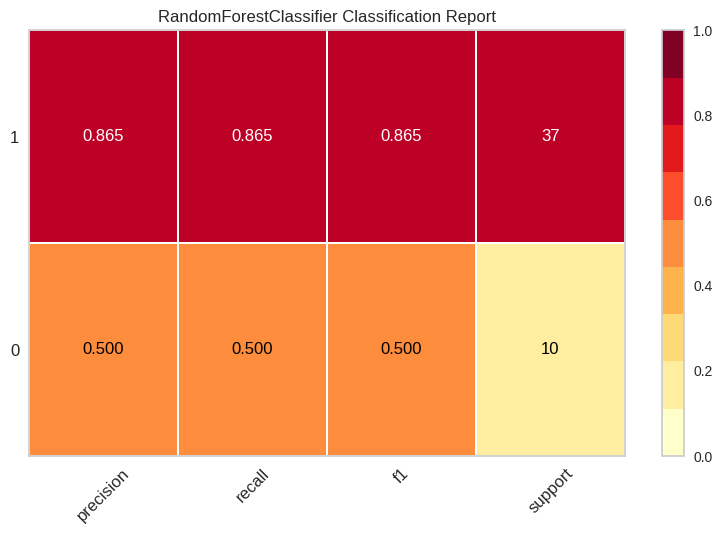


===== Decision Boundary =====


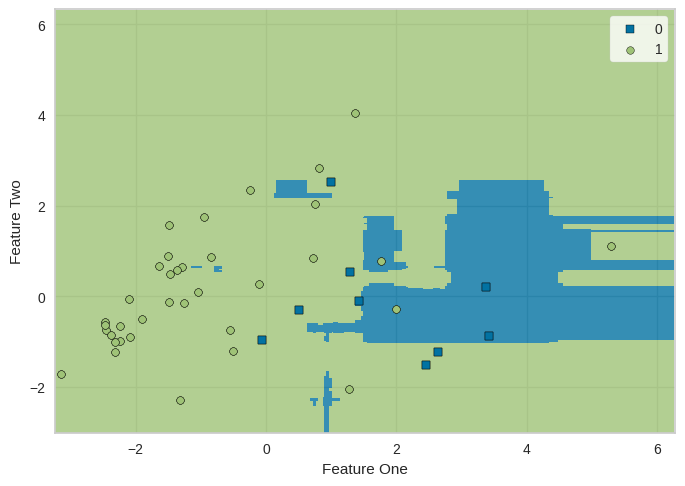


===== Recursive Feature Selection =====


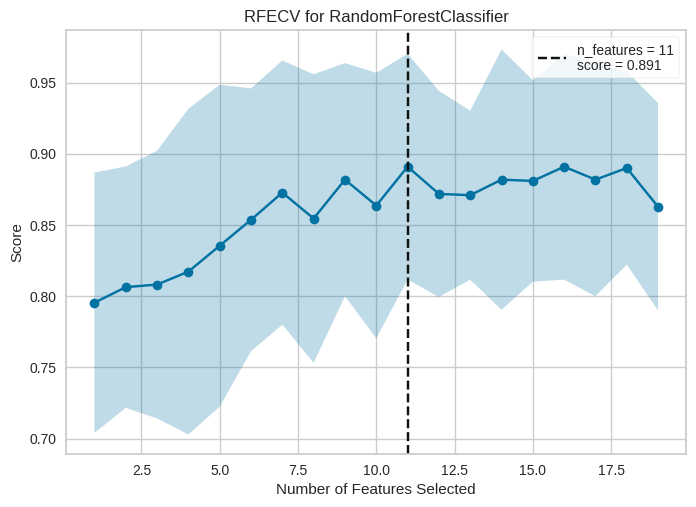


===== Learning Curve =====


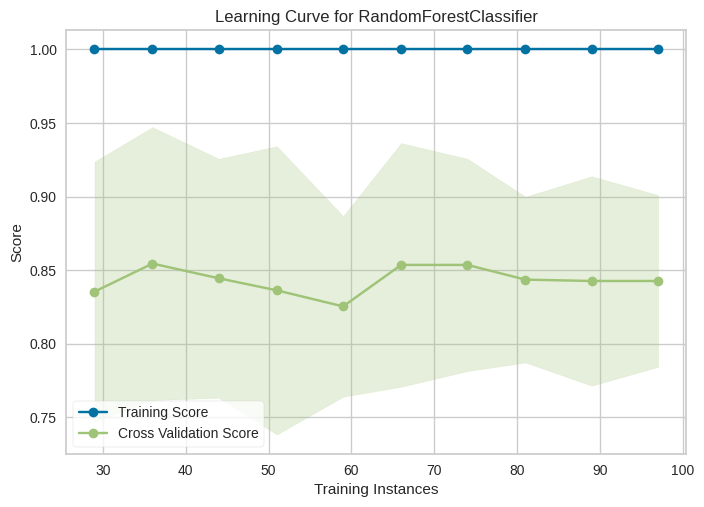


===== Manifold Learning =====


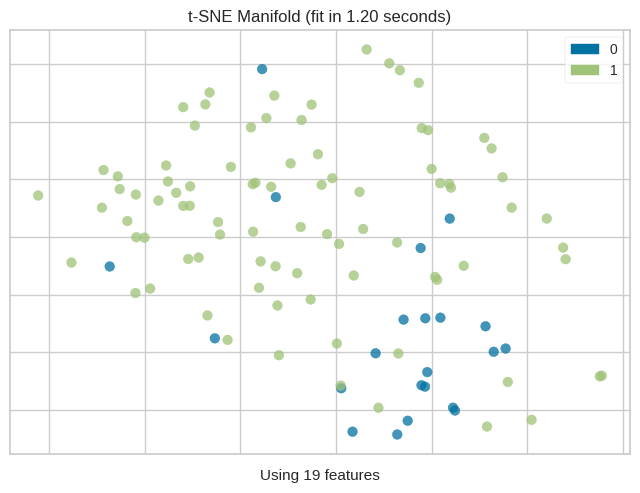


===== Calibration Curve =====


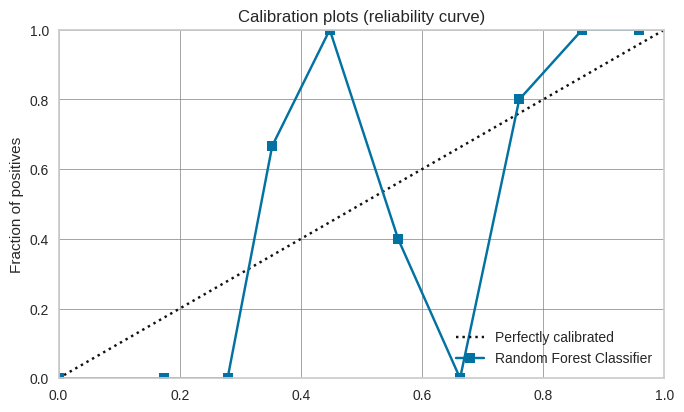


===== Validation Curve =====


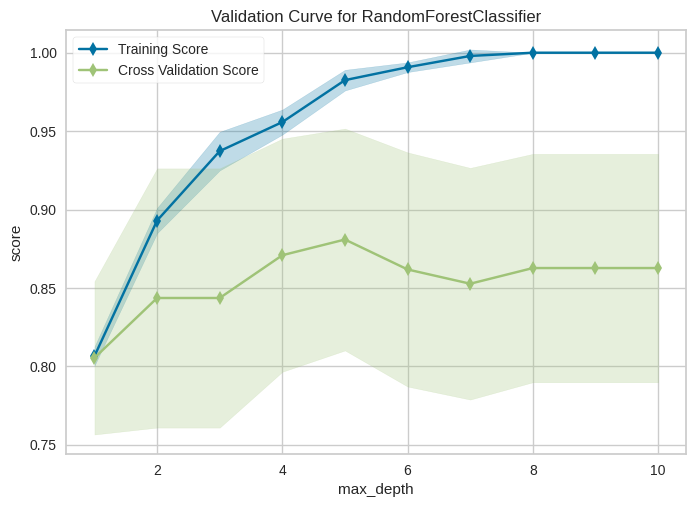


===== Dimension Learning =====


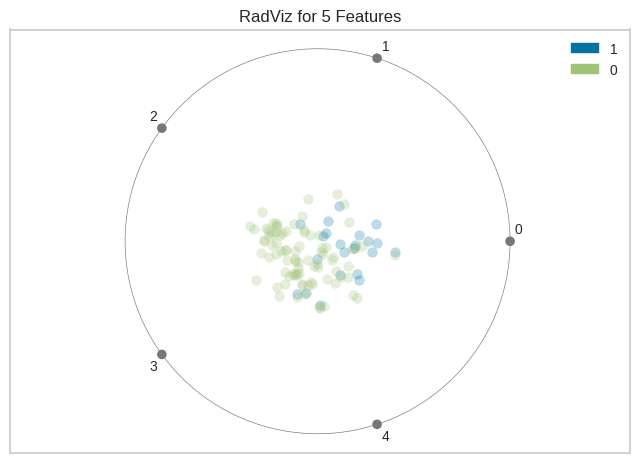


===== Feature Importance =====


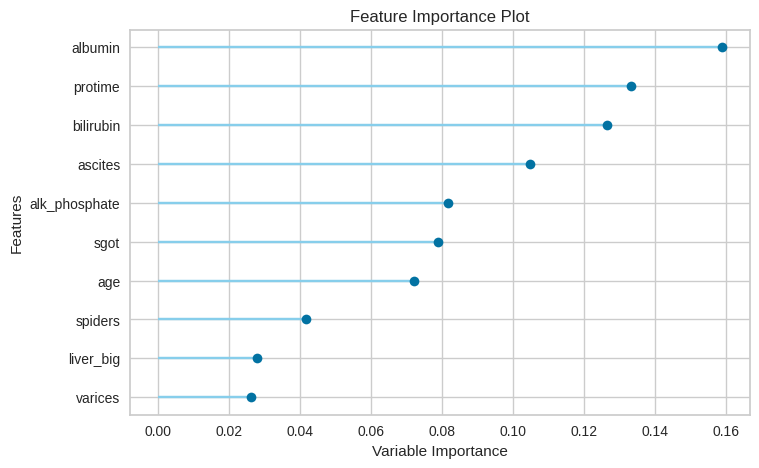


===== Feature Importance (All) =====


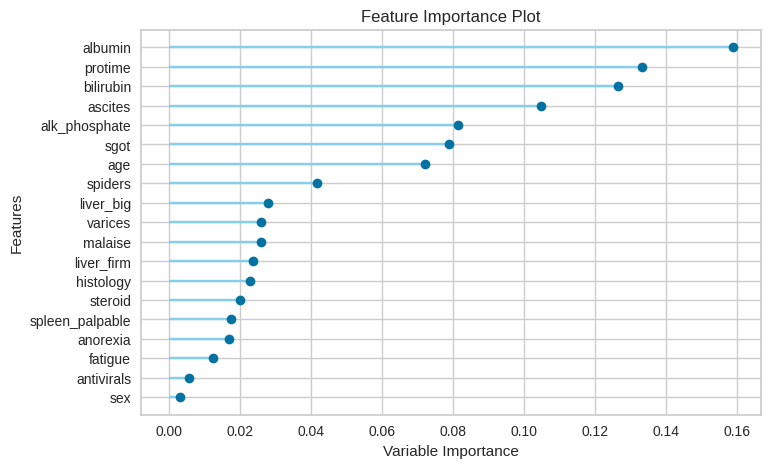


===== Model Hyperparameter =====


,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1



===== Lift Curve =====


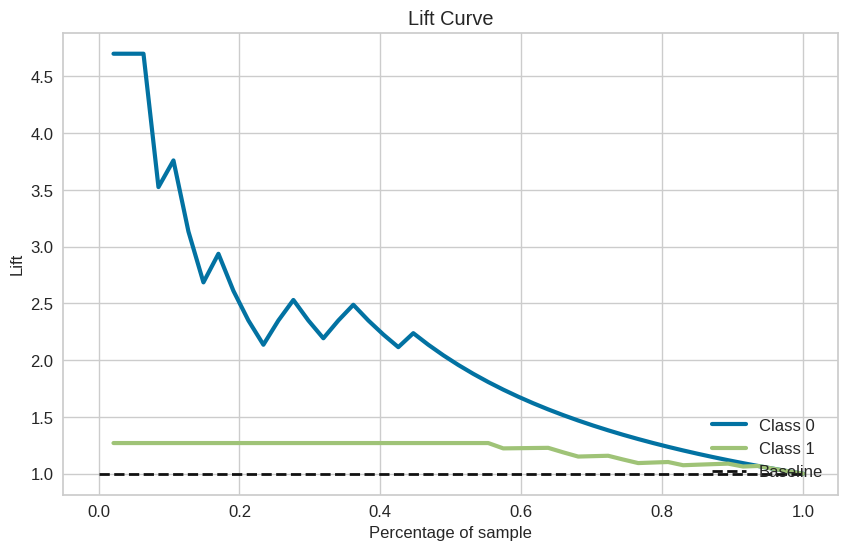


===== Gain Chart =====


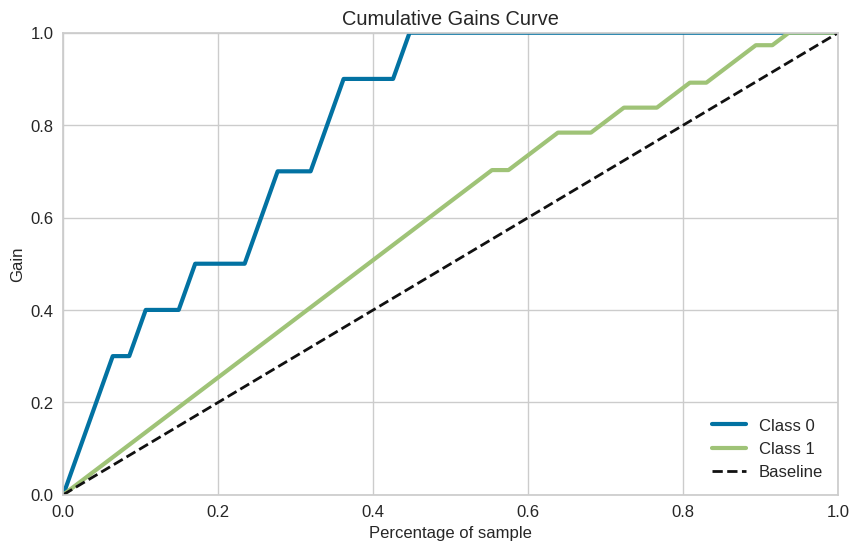


===== Decision Tree =====


Oops! Can't plot model for Decision Tree

===== KS Statistic Plot =====


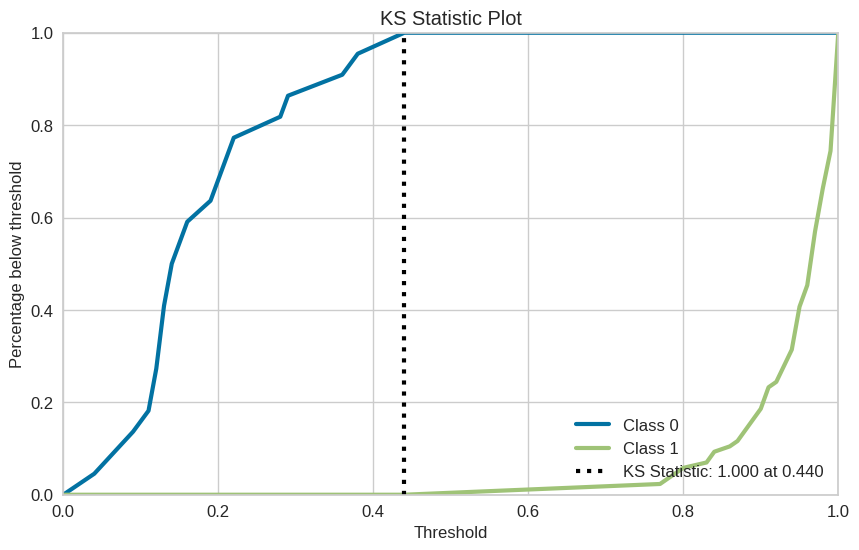

In [9]:
for key, value in attr_dict.items():
    try:
        print(f"\n===== {value} =====")
        plot_model(best, key)
        
    except AttributeError:
        print(f"Oops! Can't plot model for {value}")
    

### Making predictions

In [10]:
#### Fnctional API
predictions = predict_model(best)
predictions.head()


### OOP API
# s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7872,0.8824,0.8649,0.8649,0.8649,0.3649,0.3649


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,...,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class,prediction_label,prediction_score
122,42,0,1,0,0,0,0,1,0,1,...,0,1.500000,85.000000,40.0,3.817266,62.280899,1,1,1,0.86
44,34,0,1,0,0,0,0,1,0,0,...,0,1.427517,105.325394,86.0,3.817266,62.280899,0,1,1,0.86
112,52,0,0,0,1,0,0,1,0,0,...,0,1.000000,85.000000,30.0,4.000000,62.280899,1,1,1,1.00
75,32,0,0,1,1,1,0,1,0,0,...,0,1.000000,55.000000,45.0,4.100000,56.000000,0,1,1,0.97
150,46,0,1,0,1,1,1,1,0,0,...,1,7.600000,105.325394,242.0,3.300000,50.000000,1,0,0,0.62


### Passing the test data to make predictions

In [11]:
# functional API
# predictions = predict_model(best, data=data)
# predictions.head()

# OOP API
# predictions = s.predict_model(best, data=data)
# predictions.head()

## Displaying the probability of both classes

In [12]:
### Functional API
predictions = predict_model(best, raw_score=True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7872,0.8824,0.8649,0.8649,0.8649,0.3649,0.3649


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,...,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class,prediction_label,prediction_score_0,prediction_score_1
122,42,0,1,0,0,0,0,1,0,1,...,1.500000,85.000000,40.0,3.817266,62.280899,1,1,1,0.14,0.86
44,34,0,1,0,0,0,0,1,0,0,...,1.427517,105.325394,86.0,3.817266,62.280899,0,1,1,0.14,0.86
112,52,0,0,0,1,0,0,1,0,0,...,1.000000,85.000000,30.0,4.000000,62.280899,1,1,1,0.00,1.00
75,32,0,0,1,1,1,0,1,0,0,...,1.000000,55.000000,45.0,4.100000,56.000000,0,1,1,0.03,0.97
150,46,0,1,0,1,1,1,1,0,0,...,7.600000,105.325394,242.0,3.300000,50.000000,1,0,0,0.62,0.38


## Saving the Model

In [13]:
### Functional API
save_model(best, "best_pipeline")

## OOP API
# s.save_model(bestst, "best_pipeline")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'sex', 'steroid',
                                              'antivirals', 'fatigue', 'malaise',
                                              'anorexia', 'liver_big',
                                              'liver_firm', 'spleen_palpable',
                                              'spiders', 'ascites', 'varices',
                                              'bilirubin', 'alk_phosphate',
                                              'sgot', 'albumin', 'protime',
                                              'histology'],
                                     transformer=SimpleImputer(add_indica...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_dept

## Loading the model back to a python environment

In [14]:
### Functional API
load_model = load_model("best_pipeline")

## OOP API
# load_modeld_model = s.load_model("best_pipeline")

Transformation Pipeline and Model Successfully Loaded


In [15]:
load_model

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'sex', 'steroid',
                                             'antivirals', 'fatigue', 'malaise',
                                             'anorexia', 'liver_big',
                                             'liver_firm', 'spleen_palpable',
                                             'spiders', 'ascites', 'varices',
                                             'bilirubin', 'alk_phosphate',
                                             'sgot', 'albumin', 'protime',
                                             'histology'],
                                    transformer=SimpleImputer...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)

In [16]:
print(load_model)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'sex', 'steroid',
                                             'antivirals', 'fatigue', 'malaise',
                                             'anorexia', 'liver_big',
                                             'liver_firm', 'spleen_palpable',
                                             'spiders', 'ascites', 'varices',
                                             'bilirubin', 'alk_phosphate',
                                             'sgot', 'albumin', 'protime',
                                             'histology'],
                                    transformer=SimpleImputer...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_fea